In [1]:
import matplotlib.pyplot as plt
from rnpe.utils import _get_manual_legend, pairplot
import seaborn as sns
import pickle
import numpy as np

sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style('whitegrid', {'font.family':'Times New Roman', 'font.serif':'serif', "font.size": 11})
colors = ["#072D41", "#ECA918", "#60B3C8", "#359735"]
plt.rcParams['axes.axisbelow'] = True


### SIR Denoised

In [3]:
f_name = f"../results/sirsde/0.pickle"
with open(f_name, "rb") as f:
    res = pickle.load(f)

keep = ["log_mean", "log_max_infections", "autocor_lag1"]
new_names = ["Mean", "Max", "Autocor"]
keep_idx = [res["names"]["x"].index(n) for n in keep]

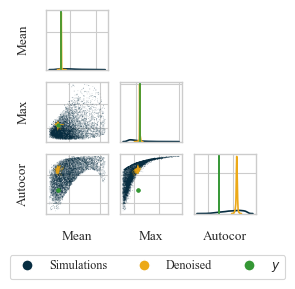

In [19]:
f_name = f"../results/sirsde/1.pickle"
with open(f_name, "rb") as f:
    res = pickle.load(f)

n = 10000
denoised = {
        "Simulations": np.random.permutation(res["data"]["x"])[:n, keep_idx],
        "Denoised": np.random.permutation(res["mcmc_samples"]["x"])[:n, keep_idx]
        }

p = pairplot(
    denoised,
    res["data"]["y"][keep_idx],
    col_names=new_names,
    true_name=r"$y$",
    colors=[colors[i] for i in range(len(colors)) if i!=2],
    facet_size=1.5,
    legend_y_adjust = -0.14,
    array_point_size = 0.4,
    true_point_size = 5,
    )

p.set_size_inches(2.7, 2.7)
p.savefig("../results/plots/sir_denoised.pdf", bbox_inches='tight', dpi=500)

### SIR Posterior

In [20]:
posteriors = {
        "Prior": res["data"]["theta"][:n],
        "NPE": res["posterior_samples"]["NPE"][:n],
        "RNPE": res["posterior_samples"]["Robust NPE"][:n],
    }

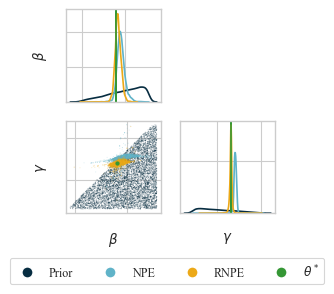

In [22]:
p = pairplot(
        posteriors,
        res["data"]["theta_true"],
        col_names=[r"$\beta$", r"$\gamma$"],
        true_name=r"$\theta^*$",
        colors=[colors[0], colors[2], colors[1], colors[3]],
        array_point_size = 0.6,
        true_point_size = 5,
        legend_y_adjust = -0.16,
        )

p.set_size_inches(2.7, 2.7)
p.savefig("../results/plots/sir_posterior.pdf", bbox_inches='tight', dpi=500)

In [4]:
from rnpe.utils import pairplot

def plot_denoised(task, seed=0, n=10000, **kwargs):
    f_name = f"../results/{task}/{seed}.pickle"
    with open(f_name, "rb") as f:
        res = pickle.load(f)

    denoised = {
        "Simulations": np.random.permutation(res["data"]["x"])[:n],
        "Denoised": np.random.permutation(res["mcmc_samples"]["x"])[:n]
        }

    p = pairplot(
        denoised,
        res["data"]["y"],
        col_names=res["names"]["x"],
        true_name="y",
        colors=[colors[i] for i in range(len(colors)) if i!=2],
        **kwargs
        )
    return p

def plot_posteriors(task, seed=0, n=10000, **kwargs):
    f_name = f"../results/{task}/{seed}.pickle"

    with open(f_name, "rb") as f:
        res = pickle.load(f)
    
    posteriors = {
        "Prior": res["data"]["theta"][:n],
        "RNPE": res["posterior_samples"]["Robust NPE"][:n],
        "NPE": res["posterior_samples"]["NPE"][:n],
    }

    pairplot(
        posteriors,
        res["data"]["theta_true"],
        col_names=res["names"]["theta"],
        true_name=r"$\theta^*$",
        colors=colors,
        **kwargs)

    